# MARKETING ANALYTICS - RFM & CLV Analysis

*Author - Olalekan Fagbuyi*

## Table of Contents

1. Introduction 
2. RFM Analysis
3. CLV Analysis
4. Combining RFM and CLTV
5. Conclusion

## 1. Introduction

In today's world, it is essential for companies to harness and levearge on data to formulate smart strategies which helps in retaining customers and improving their product satisfaction. Marketing analytics is a relatively new field that solves this problem for companies by offering meaningful insights into factors that help drive favorable outcomes.

This project applies 2 marketing analytics concepts; RFM and CLV to the customer base of an Australian bike company. The first part divides customers into different segements using the RFM framework. After segmentation is carried out, the CLV which reasonably predicts how much a company can expect from customers over the lifetime of their business relationship is then calculated 

Data was sourced from [Kaggle](https://www.kaggle.com/datasets/rahuljangam/bicycle-sales-australia) and it shows transaction details, customer details and customer demographics.

## 2. RFM Analysis

RFM is an analytic framework used to understand and analyze customer behaviour based on three factors;

* RECENCY -  Last time the customer purchased from the business

* FREQUENCY - How often does the customer patronize the business

* MONETARY - Total spend of the customer during a particular period

RFM analysis enables businesses cluster their customer base into different homogenous segments so that they can engage with each group with different targeted marketing strategies. RFM segmentation also provides answers to frequently asked business questions like;

Who are my best customers?

Which customers are on the verge of churning?

Who are lost customers that you don’t need to pay much attention to?

Who are your loyal customers?

Which customers you must retain?

Who has the potential to be converted into more profitable customers?

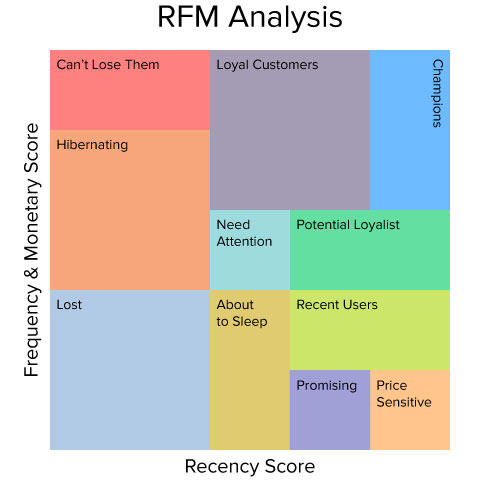

### 2.1 Importing Libraries and Loading Dataset

In [1]:
#Data Analysis
import pandas as pd
import numpy as np
import math

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as pyo
import plotly.graph_objs as go
pyo.init_notebook_mode()
from plotly.subplots import make_subplots
import plotly.express as px
import plotly as py

#Datetime manipulation
import datetime as dt

#Accessing files
import glob

#Notebook Settings
pd.set_option('display.max_columns', None)
pd.get_option('max_colwidth')
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading excel file with multiple sheets
full_df = pd.read_excel("C:\\Users\\ofagb\\OneDrive\\Documents\\Python\\RFM Data.xlsx",
                         sheet_name = ['Transactions','CustomerDemographic', 'CustomerAddress'])

In [3]:
# Get DataFrame from Dict
txns_df = full_df.get('Transactions')
demo_df = full_df.get('CustomerDemographic')
address_df = full_df.get('CustomerAddress') 

In [4]:
#viewing head of dfs
txns_df.head()

transaction_id  product_id  customer_id  transaction_date  online_order  \
0               1           2         2950             42791           0.0   
1               2           3         3120             42876           1.0   
2               3          37          402             43024           0.0   
3               4          88         3135             42978           0.0   
4               5          78          787             43009           1.0   

  order_status           brand product_line product_class product_size  \
0     Approved           Solex     Standard        medium       medium   
1     Approved   Trek Bicycles     Standard        medium        large   
2     Approved      OHM Cycles     Standard           low       medium   
3     Approved  Norco Bicycles     Standard        medium       medium   
4     Approved  Giant Bicycles     Standard        medium        large   

   list_price  standard_cost product_first_sold_date  
0       71.49          53.62              2012-12-02  
1     2091.47         388.92              2014-03-03  
2     1793.43         248.82              1999-07-20  
3     1198.46         381.10              1998-12-16  
4     1765.30         709.48              2015-08-10

In [5]:
demo_df.head()

customer_id      first_name  last_name  gender  \
0            1         Laraine  Medendorp       F   
1            2             Eli    Bockman    Male   
2            3           Arlin     Dearle    Male   
3            4          Talbot        NaN    Male   
4            5  Sheila-kathryn     Calton  Female   

   past_3_years_bike_related_purchases        DOB               job_title  \
0                                   93 1953-10-12     Executive Secretary   
1                                   81 1980-12-16  Administrative Officer   
2                                   61 1954-01-20      Recruiting Manager   
3                                   33 1961-10-03                     NaN   
4                                   56 1977-05-13           Senior Editor   

  job_industry_category     wealth_segment deceased_indicator owns_car  tenure  
0                Health      Mass Customer                  N      Yes    11.0  
1    Financial Services      Mass Customer                  N      Yes    16.0  
2              Property      Mass Customer                  N      Yes    15.0  
3                    IT      Mass Customer                  N       No     7.0  
4                   NaN  Affluent Customer                  N      Yes     8.0

In [6]:
address_df.head()

customer_id              address  postcode state    country  \
0            1   060 Morning Avenue      2016    WA  Australia   
1            2  6 Meadow Vale Court      2153    WA  Australia   
2            4   0 Holy Cross Court      4211   QLD  Australia   
3            5  17979 Del Mar Point      2448    WA  Australia   
4            6     9 Oakridge Court      3216   VIC  Australia   

   property_valuation  
0                  10  
1                  10  
2                   9  
3                   4  
4                   9

In [7]:
#merge all dfs on customer_id
from functools import reduce

#define list of DataFrames
dfs = [txns_df, demo_df, address_df]

#merge all DataFrames into one
all_df = reduce(lambda  left,right: pd.merge(left,right,on=['customer_id'],
                                            how='outer'), dfs)
print(all_df.shape)
all_df.head()

(20510, 29)


transaction_id  product_id  customer_id  transaction_date  online_order  \
0             1.0         2.0         2950           42791.0           0.0   
1         11065.0         1.0         2950           43024.0           0.0   
2         18923.0        62.0         2950           42851.0           0.0   
3             2.0         3.0         3120           42876.0           1.0   
4          6862.0         4.0         3120           43013.0           0.0   

  order_status           brand product_line product_class product_size  \
0     Approved           Solex     Standard        medium       medium   
1     Approved  Giant Bicycles     Standard        medium       medium   
2     Approved           Solex     Standard        medium       medium   
3     Approved   Trek Bicycles     Standard        medium        large   
4     Approved  Giant Bicycles     Standard          high       medium   

   list_price  standard_cost product_first_sold_date first_name  last_name  \
0       71.49          53.62              2012-12-02    Kristos    Anthony   
1     1403.50         954.82              2003-02-07    Kristos    Anthony   
2      478.16         298.72              2010-11-05    Kristos    Anthony   
3     2091.47         388.92              2014-03-03     Lauree  O'Donnell   
4     1129.13         677.48              2011-04-16     Lauree  O'Donnell   

   gender  past_3_years_bike_related_purchases        DOB  \
0    Male                                 19.0 1955-01-11   
1    Male                                 19.0 1955-01-11   
2    Male                                 19.0 1955-01-11   
3  Female                                 89.0 1979-02-04   
4  Female                                 89.0 1979-02-04   

             job_title job_industry_category wealth_segment  \
0  Software Engineer I    Financial Services  Mass Customer   
1  Software Engineer I    Financial Services  Mass Customer   
2  Software Engineer I    Financial Services  Mass Customer   
3  Clinical Specialist                Health  Mass Customer   
4  Clinical Specialist                Health  Mass Customer   

  deceased_indicator owns_car  tenure            address  postcode state  \
0                  N      Yes    10.0  984 Hoepker Court    3064.0   VIC   
1                  N      Yes    10.0  984 Hoepker Court    3064.0   VIC   
2                  N      Yes    10.0  984 Hoepker Court    3064.0   VIC   
3                  N      Yes    10.0    4 Shopko Circle    2196.0   NSW   
4                  N      Yes    10.0    4 Shopko Circle    2196.0   NSW   

     country  property_valuation  
0  Australia                 6.0  
1  Australia                 6.0  
2  Australia                 6.0  
3  Australia                 5.0  
4  Australia                 5.0

### 2.2 Exploratory Data Analysis

In this section, exploratory data analysis (EDA) will be carried out on the dataset to summarize its main characteristics, using statistical and data visualization methods. Also, obvious patterns, errors will be identified with the dataset terns within the data, as well as finding possible relationship among variables.

In [8]:
#checking for datatypes and null values
all_df.dtypes

transaction_id                                float64
product_id                                    float64
customer_id                                     int64
transaction_date                              float64
online_order                                  float64
order_status                                   object
brand                                          object
product_line                                   object
product_class                                  object
product_size                                   object
list_price                                    float64
standard_cost                                 float64
product_first_sold_date                datetime64[ns]
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases           float64
DOB                                    datetime64[ns]
job_title                   

In [9]:
#Getting percentage of missing values per column
percentage_missing = all_df.isnull().sum()*100/len(all_df)
percentage_missing

transaction_id                          2.486592
product_id                              2.486592
customer_id                             0.000000
transaction_date                        2.486592
online_order                            4.241833
order_status                            2.486592
brand                                   3.447099
product_line                            3.447099
product_class                           3.447099
product_size                            3.447099
list_price                              2.486592
standard_cost                           3.447099
product_first_sold_date                 3.447099
first_name                              0.029254
last_name                               3.222818
gender                                  0.029254
past_3_years_bike_related_purchases     0.029254
DOB                                     2.257435
job_title                              12.106290
job_industry_category                  16.235982
wealth_segment      

<AxesSubplot: >

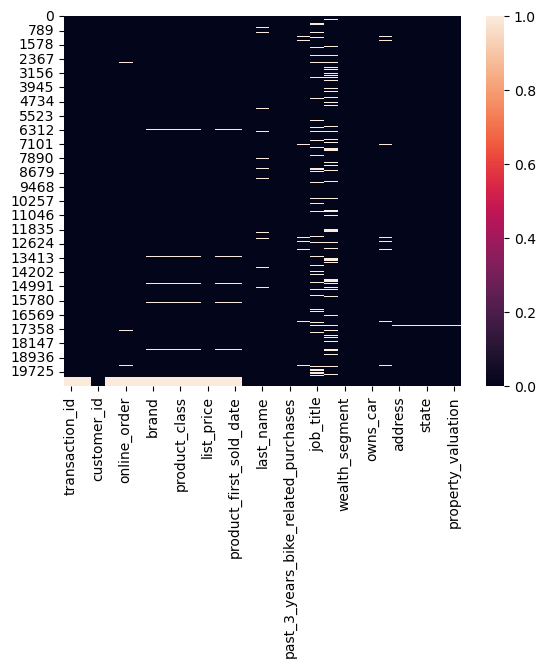

In [10]:
#visualizing missing values via an heatmap
sns.heatmap(all_df.isnull())

In [11]:
#are there duplicates
print(all_df.duplicated().any())

#how many duplicates?
duplicates = all_df.duplicated().sum()
print(duplicates)

False
0


In [12]:
#summarizing key statistical measures and distribtuon of the df
all_df.describe()

transaction_id   product_id   customer_id  transaction_date  \
count    20000.000000  20000.00000  20510.000000      20000.000000   
mean     10000.500000     45.36465   1787.736226      42917.588950   
std       5773.647028     30.75359   1047.115605        105.363068   
min          1.000000      0.00000      1.000000      42736.000000   
25%       5000.750000     18.00000    883.250000      42826.000000   
50%      10000.500000     44.00000   1781.500000      42919.000000   
75%      15000.250000     72.00000   2677.000000      43010.000000   
max      20000.000000    100.00000   5034.000000      43099.000000   

       online_order    list_price  standard_cost  \
count  19640.000000  20000.000000   19803.000000   
mean       0.500458   1107.829449     556.046951   
std        0.500013    582.825242     405.955660   
min        0.000000     12.010000       7.210000   
25%        0.000000    575.270000     215.140000   
50%        1.000000   1163.890000     507.580000   
75%        1.000000   1635.300000     795.100000   
max        1.000000   2091.470000    1759.850000   

       past_3_years_bike_related_purchases        tenure      postcode  \
count                         20504.000000  20047.000000  20478.000000   
mean                             48.789602     10.678256   2986.966696   
std                              28.621405      5.673263    849.902839   
min                               0.000000      1.000000   2000.000000   
25%                              24.000000      6.000000   2200.000000   
50%                              48.000000     11.000000   2767.000000   
75%                              73.000000     15.000000   3752.000000   
max                              99.000000     22.000000   4883.000000   

       property_valuation  
count        20478.000000  
mean             7.516066  
std              2.825164  
min              1.000000  
25%              6.000000  
50%              8.000000  
75%             10.000000  
max             12.000000

In [13]:
#value counts of all key categorical variables
cat_columns= all_df.select_dtypes(include=object)
cat_columns2 = cat_columns.drop(columns = ['address','first_name', 'last_name', 'job_title', 'job_industry_category'], axis = 1)

#converting value counts to a dataframe
cat_distr= cat_columns2.columns.tolist()
(pd.DataFrame(
    cat_columns2[cat_distr]
    .melt(var_name='Category', value_name='Value')
    .value_counts())
.rename(columns={0: 'Count'})
.sort_values(by=['Category', 'Count'])).reset_index()

Category              Value  Count
0                brand     Norco Bicycles   2910
1                brand      Trek Bicycles   2990
2                brand         OHM Cycles   3043
3                brand           WeareA2B   3295
4                brand     Giant Bicycles   3312
5                brand              Solex   4253
6              country          Australia  20478
7   deceased_indicator                  Y      9
8   deceased_indicator                  N  20495
9               gender                  M      6
10              gender              Femal      7
11              gender                  F     11
12              gender                  U    466
13              gender               Male   9742
14              gender             Female  10272
15        order_status          Cancelled    179
16        order_status           Approved  19821
17            owns_car                 No  10187
18            owns_car                Yes  10317
19       product_class                low   2964
20       product_class               high   3013
21       product_class             medium  13826
22        product_line           Mountain    423
23        product_line            Touring   1234
24        product_line               Road   3970
25        product_line           Standard  14176
26        product_size              small   2837
27        product_size              large   3976
28        product_size             medium  12990
29               state                 wA      6
30               state                 WA   1078
31               state                QLD   4344
32               state                VIC   4665
33               state                NSW  10385
34      wealth_segment  Affluent Customer   4986
35      wealth_segment     High Net Worth   5214
36      wealth_segment      Mass Customer  10304

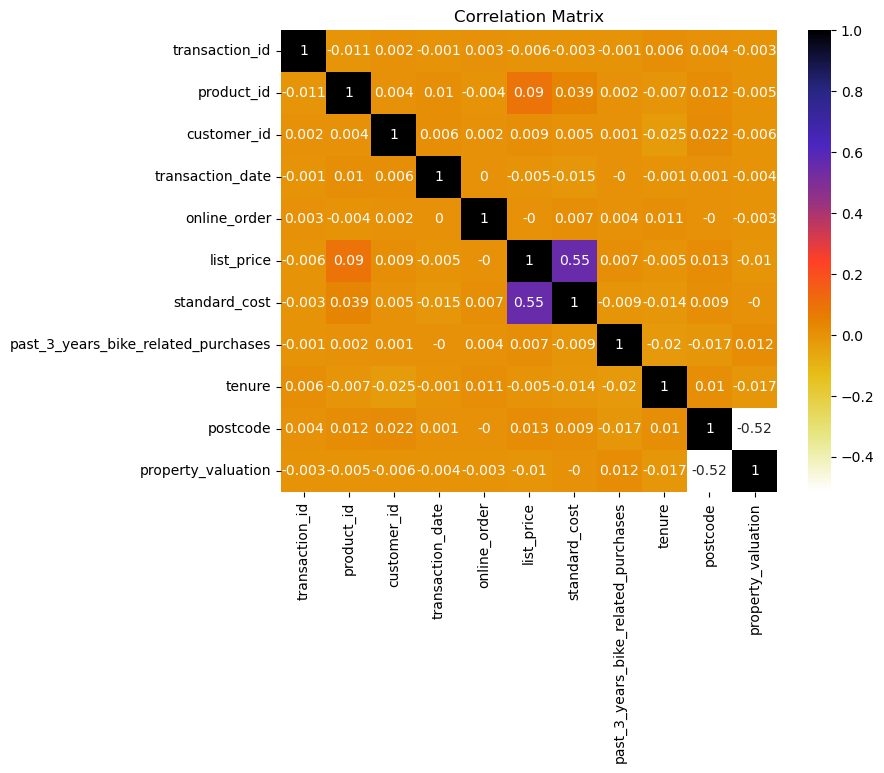

In [14]:
#checking for correlation among numerical variables
num_columns = all_df.select_dtypes(include=[np.number])
cor = num_columns.corr().round(decimals = 3)
cor

#visualizing correlation
plt.figure(figsize=(8,6)) #increase heatmap size
sns.heatmap(cor, annot = True, cmap=plt.cm.CMRmap_r)
plt.title('Correlation Matrix')
plt.savefig('Correlation Matrix', dpi =200, bbox_inches = 'tight')

### 2.3 Data Cleaning

After performing EDA, the data cleaning process which involves identifying and correcting corrupt, incomplete, duplicated, incorrect, and irrelevant data is carried out. Incosistencies will also be spotted and resolved in order to improve the quality of the dataset.

In [15]:
#dropping null values
all_df2 = all_df.dropna(subset=['customer_id', 'transaction_date', 'list_price'])
print(all_df2.shape)

(20000, 29)


In [16]:
#dropping unnecessary columns
required_df = all_df2.drop(columns = ['transaction_id', 'product_id', 'brand', 'product_line','standard_cost', 'product_first_sold_date',
                                     'past_3_years_bike_related_purchases','job_title', 'job_industry_category', 'wealth_segment', 
                                     'owns_car', 'tenure', 'country','property_valuation', 'product_class', 'product_size', 'DOB'], axis = 1)
print(required_df.shape)
required_df.head()

(20000, 12)


customer_id  transaction_date  online_order order_status  list_price  \
0         2950           42791.0           0.0     Approved       71.49   
1         2950           43024.0           0.0     Approved     1403.50   
2         2950           42851.0           0.0     Approved      478.16   
3         3120           42876.0           1.0     Approved     2091.47   
4         3120           43013.0           0.0     Approved     1129.13   

  first_name  last_name  gender deceased_indicator            address  \
0    Kristos    Anthony    Male                  N  984 Hoepker Court   
1    Kristos    Anthony    Male                  N  984 Hoepker Court   
2    Kristos    Anthony    Male                  N  984 Hoepker Court   
3     Lauree  O'Donnell  Female                  N    4 Shopko Circle   
4     Lauree  O'Donnell  Female                  N    4 Shopko Circle   

   postcode state  
0    3064.0   VIC  
1    3064.0   VIC  
2    3064.0   VIC  
3    2196.0   NSW  
4    2196.0   NSW

In [17]:
#cleaning up columns

#converting columns to appropriate data types
required_df['transaction_date'] = pd.TimedeltaIndex(required_df['transaction_date'], unit='d') + dt.datetime(1900,1,1)
required_df['postcode'] = required_df['postcode'].fillna(0).astype(int)

#replacing wrong values in columns
required_df = required_df.replace({'online_order': {0: 'No',  1: 'Yes'}})
required_df = required_df.replace({'gender': {'M': 'Male',  'F': 'Female','Femal': 'Female',  'U': 'Others'}})
required_df = required_df.replace({'state': {'wA': 'WA'}})

#merging name column
required_df['full_name'] = required_df['first_name'].map(str) + ' ' + required_df['last_name'].map(str)
required_df = required_df.drop(columns = ['first_name', 'last_name' ], axis = 1)

required_df.head()

customer_id transaction_date online_order order_status  list_price  gender  \
0         2950       2017-02-27           No     Approved       71.49    Male   
1         2950       2017-10-18           No     Approved     1403.50    Male   
2         2950       2017-04-28           No     Approved      478.16    Male   
3         3120       2017-05-23          Yes     Approved     2091.47  Female   
4         3120       2017-10-07           No     Approved     1129.13  Female   

  deceased_indicator            address  postcode state         full_name  
0                  N  984 Hoepker Court      3064   VIC   Kristos Anthony  
1                  N  984 Hoepker Court      3064   VIC   Kristos Anthony  
2                  N  984 Hoepker Court      3064   VIC   Kristos Anthony  
3                  N    4 Shopko Circle      2196   NSW  Lauree O'Donnell  
4                  N    4 Shopko Circle      2196   NSW  Lauree O'Donnell

In [18]:
#picking relevant columns for rfm analysis
rfm_data = required_df[(required_df['order_status'] == 'Approved') & (required_df['deceased_indicator'] == 'N')]

print(rfm_data.shape)
rfm_data.head()

(19810, 11)


customer_id transaction_date online_order order_status  list_price  gender  \
0         2950       2017-02-27           No     Approved       71.49    Male   
1         2950       2017-10-18           No     Approved     1403.50    Male   
2         2950       2017-04-28           No     Approved      478.16    Male   
3         3120       2017-05-23          Yes     Approved     2091.47  Female   
4         3120       2017-10-07           No     Approved     1129.13  Female   

  deceased_indicator            address  postcode state         full_name  
0                  N  984 Hoepker Court      3064   VIC   Kristos Anthony  
1                  N  984 Hoepker Court      3064   VIC   Kristos Anthony  
2                  N  984 Hoepker Court      3064   VIC   Kristos Anthony  
3                  N    4 Shopko Circle      2196   NSW  Lauree O'Donnell  
4                  N    4 Shopko Circle      2196   NSW  Lauree O'Donnell

### 2.4 Recency, Frequency, Monetary (RFM)

Each factor will be calculated in this section using pandas functions. The dataframe will be grouped by last purchase date to determine day since last purchase, customer name to determine count of purchase and list price to get monetary value. 

In [19]:
#calculating recency
rfm_recency = rfm_data.groupby(by='full_name',as_index=False)[['customer_id','transaction_date']].max()
rfm_recency.columns = ['full_name', 'customer_id','last_purchase_date', ]

recent_date = rfm_recency['last_purchase_date'].max()

rfm_recency['recency'] = rfm_recency['last_purchase_date'].apply(lambda x: (recent_date - x).days)
rfm_recency.head()

full_name  customer_id last_purchase_date  recency
0       Aarika Magog         1368         2017-11-14       48
1  Aarika Van Vuuren          164         2017-06-17      198
2   Abagail Tordiffe          508         2017-07-30      155
3       Abba Masedon           57         2017-11-27       35
4       Abbey Murrow         2413         2017-11-04       58

   no_of_customers  days_from_purchase
0               11                  59
1                2                  57
2               14                  57
3               12                  52
4                5                  52


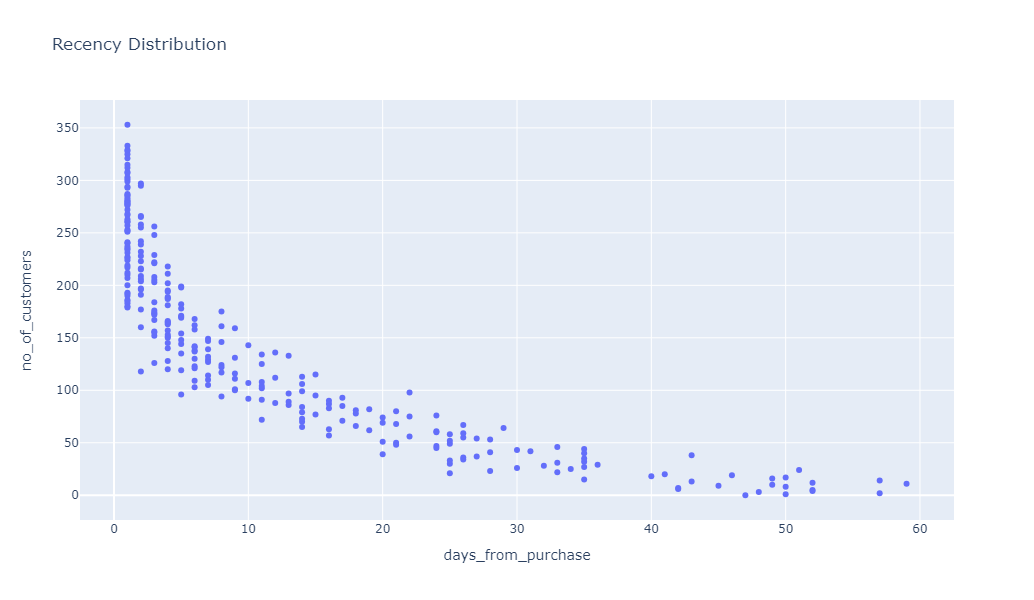

In [20]:
#visualizing recency
recency_count = rfm_recency['recency'].value_counts()

#converting series to df and resetting index
recency = pd.DataFrame(recency_count)
recency = recency.reset_index()
recency.columns = ['no_of_customers', 'days_from_purchase']
print(recency.head())

fig = px.scatter(recency, x="days_from_purchase", y="no_of_customers",
                 title = 'Recency Distribution',width=800, height=600)
fig.show()

In [21]:
#calculating frequency
rfm_frequency = rfm_data.groupby(by=['full_name'], as_index=False).agg(customer_id = ('customer_id', 'max'),
                                                                       frequency = ('transaction_date', 'count')) 
rfm_frequency.head()

full_name  customer_id  frequency
0       Aarika Magog         1368          6
1  Aarika Van Vuuren          164          3
2   Abagail Tordiffe          508          6
3       Abba Masedon           57          6
4       Abbey Murrow         2413          7

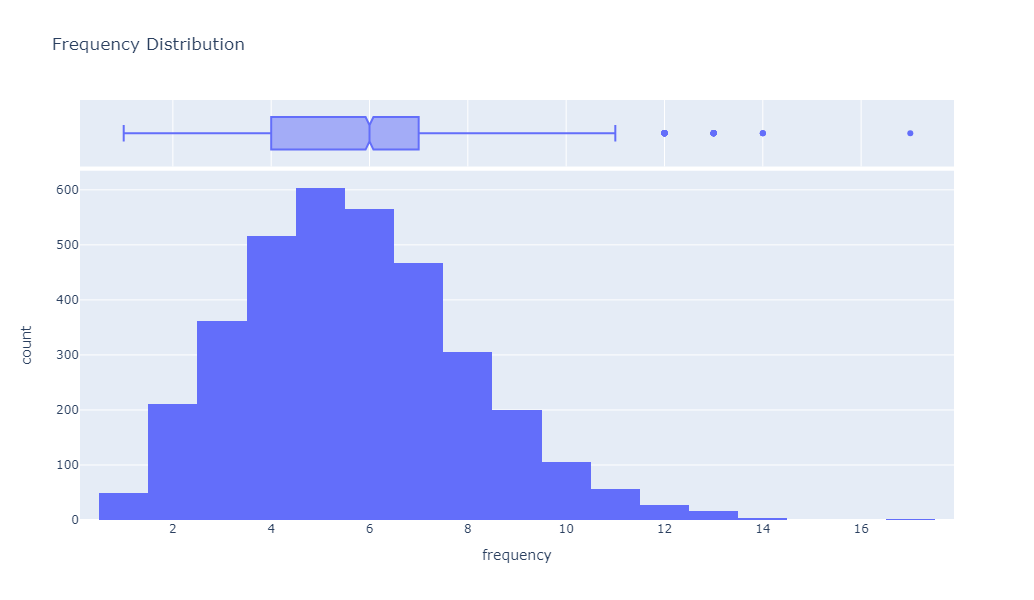

In [22]:
#visualizing frequency
fig = px.histogram(rfm_frequency, x="frequency", marginal="box", title = 'Frequency Distribution',
                  width=800, height=600)
fig.show()

In [23]:
#calculating monetary
rfm_monetary = rfm_data.groupby(by=['full_name'], as_index=False).agg(customer_id = ('customer_id', 'max'),
                                                                       monetary = ('list_price', 'sum')) 
rfm_monetary.head()

full_name  customer_id  monetary
0       Aarika Magog         1368   6882.69
1  Aarika Van Vuuren          164   2583.85
2   Abagail Tordiffe          508   7648.20
3       Abba Masedon           57   8748.75
4       Abbey Murrow         2413   8666.87

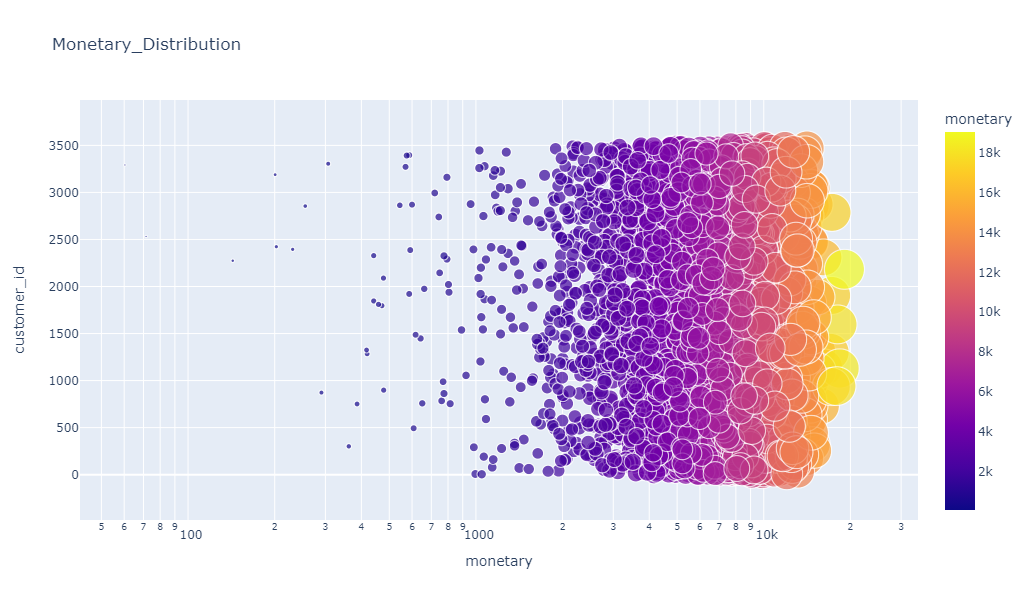

In [24]:
#vizualizing monetary distribution
fig = px.scatter(rfm_monetary, x="monetary", y="customer_id",size="monetary",color="monetary",hover_name="full_name", 
                 title = 'Monetary_Distribution',log_x=True, size_max=40, width=800, height=600)
fig.show()

In [25]:
#merging all 3 dfs
rfm1 = pd.merge(rfm_recency, rfm_frequency, how="outer", 
                  on=["full_name", "customer_id"]).drop(columns='last_purchase_date')

rfm_df= pd.merge(rfm1, rfm_monetary, how='outer',on=["full_name", "customer_id"])
rfm_df.head()

full_name  customer_id  recency  frequency  monetary
0       Aarika Magog         1368       48          6   6882.69
1  Aarika Van Vuuren          164      198          3   2583.85
2   Abagail Tordiffe          508      155          6   7648.20
3       Abba Masedon           57       35          6   8748.75
4       Abbey Murrow         2413       58          7   8666.87

### 2.5 Customer Segmentation

At this point, the dataset will be divided into 3 quantiles where each customer will get a value from 1-3 for Recency, Frequency and Monetary parameters. The higher number signifying a higher score. i.e 3 implies most recent, more frequent and high spending customers with 1 signifies the opposite end of the scale.

The rfm dataframe will be divided into quartiles with each one containing 33.33% of the population.

In [26]:
# Dividing the recency, frequency and monetary into 3 groups with (0 to 33.33%, 33.33% to 66.66%, 66.65% to 100%) using pd.cut() function
rfm_df['r_score'] = pd.qcut(rfm_df['recency'], 3, ['3','2','1']) #recency has a reverse order because the lower the better
rfm_df['f_score'] = pd.qcut(rfm_df['frequency'], 3, ['1','2','3'])
rfm_df['m_score'] = pd.qcut(rfm_df['monetary'], 3, ['1','2','3'])

#concetating r-f-m scores into single rfm_score column
rfm_df["rfm_score"] = rfm_df["r_score"].astype(str) +rfm_df["f_score"].astype(str) + rfm_df["m_score"].astype(str)

#converting rfm_score column into int dtype
rfm_df['rfm_score'] = rfm_df['rfm_score'].astype(str).astype(int)

print(rfm_df.dtypes)
print(rfm_df.shape)
rfm_df.head(10)

full_name        object
customer_id       int64
recency           int64
frequency         int64
monetary        float64
r_score        category
f_score        category
m_score        category
rfm_score         int32
dtype: object
(3489, 9)


full_name  customer_id  recency  frequency  monetary r_score  \
0       Aarika Magog         1368       48          6   6882.69       2   
1  Aarika Van Vuuren          164      198          3   2583.85       1   
2   Abagail Tordiffe          508      155          6   7648.20       1   
3       Abba Masedon           57       35          6   8748.75       2   
4       Abbey Murrow         2413       58          7   8666.87       2   
5       Abbey Nellen         3409       73          7   7353.55       1   
6      Abbott Knaggs         3189       56          2    200.70       2   
7          Abe Ealam         3380       63          5   6088.51       2   
8         Abe Pilley         1078       18          6   5117.10       3   
9         Abe Townby         1942       16          8   6241.37       3   

  f_score m_score  rfm_score  
0       2       2        222  
1       1       1        111  
2       2       3        123  
3       2       3        223  
4       2       3        223  
5       2       3        123  
6       1       1        211  
7       1       2        212  
8       2       2        322  
9       3       2        332

In [27]:
#creating columns for customer segments based on rfm scores
segment_dict = {333: 'Champions', 332: 'Loyalists', 331: 'Loyalists', 323: 'Loyalists', 322: 'Loyalists', 233: 'Loyalists',
               232: 'Loyalists', 223: 'Loyalists', 321: 'Potential Loyalists', 231 :'Potential Loyalists', 222:'Potential Loyalists',
               321:'Potential Loyalists', 231:'Potential Loyalists', 222:'Potential Loyalists', 313: 'New Customers', 312: 'New Customers', 
                213: 'New Customers', 311:'Promising', 221 :'Promising', 211:'Promising', 122: 'Needs Attention', 123 : 'Needs Attention',
                212: 'Needs Attention',112 : 'About to Sleep',121 : 'About to Sleep', 132 : 'At Risk', 133 : 'Cannot Lose Them', 
                112: 'Hibernating',113 : 'Hibernating', 111 : 'Lost Customers'}

rfm_df['customer_segment'] = rfm_df['rfm_score'].map(segment_dict)
rfm_df

full_name  customer_id  recency  frequency  monetary r_score  \
0          Aarika Magog         1368       48          6   6882.69       2   
1     Aarika Van Vuuren          164      198          3   2583.85       1   
2      Abagail Tordiffe          508      155          6   7648.20       1   
3          Abba Masedon           57       35          6   8748.75       2   
4          Abbey Murrow         2413       58          7   8666.87       2   
...                 ...          ...      ...        ...       ...     ...   
3484       Zollie Exell         2677       27          5   5446.05       2   
3485      Zonnya Fayter         2188       70          6   6671.54       1   
3486     Zonnya Tolland         1754      142          5   6904.57       1   
3487  Zorina Bosomworth          702       62          3   3825.66       2   
3488  Zulema Cristofolo         3413       25          4   6325.24       3   

     f_score m_score  rfm_score     customer_segment  
0          2       2        222  Potential Loyalists  
1          1       1        111       Lost Customers  
2          2       3        123      Needs Attention  
3          2       3        223            Loyalists  
4          2       3        223            Loyalists  
...      ...     ...        ...                  ...  
3484       1       2        212      Needs Attention  
3485       2       2        122      Needs Attention  
3486       1       2        112          Hibernating  
3487       1       1        211            Promising  
3488       1       2        312        New Customers  

[3489 rows x 10 columns]

In [28]:
#creating a df for the Platform value counts
segment_count = rfm_df['customer_segment'].value_counts()

segment_df = pd.DataFrame({'customer_segment': segment_count.index, 'no_of_customers': segment_count.values})

#creating new column for Percent of Tweets for each Device_App
segment_df['segment_percent'] = round((segment_df['no_of_customers'] / segment_df['no_of_customers'].sum()) * 100,2)
segment_df.head(11)

customer_segment  no_of_customers  segment_percent
0             Loyalists              833            23.88
1             Promising              594            17.02
2        Lost Customers              520            14.90
3       Needs Attention              439            12.58
4             Champions              306             8.77
5           Hibernating              261             7.48
6   Potential Loyalists              207             5.93
7         New Customers              206             5.90
8      Cannot Lose Them               92             2.64
9        About to Sleep               19             0.54
10              At Risk               12             0.34

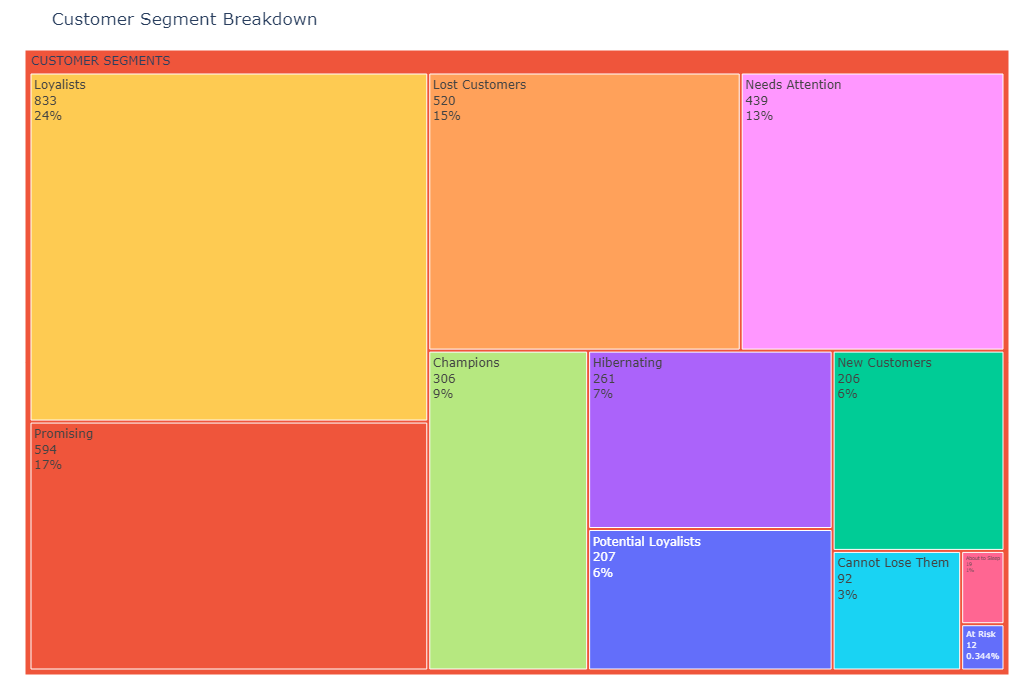

In [29]:
fig = px.treemap(segment_df, path=[px.Constant("CUSTOMER SEGMENTS"), 'customer_segment'], values='no_of_customers',
                  color='customer_segment',color_continuous_scale= 'earth',
                  color_continuous_midpoint=np.average(segment_df['no_of_customers']))

fig.update_layout(title="Customer Segment Breakdown", margin = dict(t=50, l=25, r=25, b=25),width=800, height=700)
fig.data[0].textinfo = "label+value+percent parent"
fig.show()

### 2.6 Segment Strategies

| RFM Score | Customer Segement | Description |Recommendations |
| --- | --- | --- |--- |
| 333 | Champions | Bought recently, buys often and spends the most | Prioritize and reward them. Convert to early adapters and product evangelist who spread word of the brand|
| 332, 331, 323, 322, 233, 232, 223 | Loyalists | They have bought recently and they buy frequently | Offer loyalty programs for them to feel valued and upsell|
| 321, 231, 222 | Potential Loyalists| Recent customers that have bought a lot and more than once |Recommend more products to upscale to Loyalists|
| 313, 312, 213| New Customers | Recent customers that spent well but haven't bought frequently | Increased brand education to build awareness |
| 311, 221, 211 | Promising | Recent customers that haven't spent much |Create brand awareness by offering free trials or product samples |
| 212, 123, 122 | Needs Atention | Buys often and spends money but hasn't bought recently | Offer personalized communication and new product recommendions based on purchase history to reactivate this segment |
| 112, 121 | About to Sleep| Haven't bought in a while with below average frequency and monetary values | Reconnect with them for one last push offering discounted and popular deals |
| 132 | At Risk | They buy much and do so frequently, but they haven’t shopped recently.  | Bring back buy offering personalized communications and targeted products |
| 133 | Cannot Lose Them | They spend a lot but haven't bought recently | Run surveys to know what went wrong and try to win back after fixing issues |
| 112, 113 | Hibernating| Haven't bought in a long time and doesn't buy frequently |Decide if you want them then go after with relevant promos|
| 111 | Lost Customers | They didn’t make any purchase for a long time and they never spent a lot |Ignore, they offer little or no value to business |

## 3. CLV Analysis

Customer lifetime value (CLV) as defined earlier is a metric that is used to reasonably predict the total revenue expected from a customer throughout the business relationship with a company. CLV also demonstrates the implications of acquiring long-term customers compared to new customers.

The CLV metric is important while formulate marketing strategies as it;

1. Helps in increasing revenue over time.
2. Enables businesses target the ideal customers i.e. customers who spend more and stay for longer periods
3. CLV also helps in determining the ideal customer acquisition cost.

CLV for each customer will be calculated from the previous dataset using the formulae:
**(Average Order Value x Purchase Frequency)/Churn Rate) x Profit margin**

* Average Order Value (AOV) = Total Revenue / Total Number of Orders
* Purchase Frequency (PF) = Total Number of Orders / Total Number of Customers
* Churn Rate = rate at which customers are leaving the business
* Profit Margin = Profit/Sales X 100

### 3.1 Loading dataset

In [30]:
#retrieve rfm_df from section 1.4
rfm_df.head()

full_name  customer_id  recency  frequency  monetary r_score  \
0       Aarika Magog         1368       48          6   6882.69       2   
1  Aarika Van Vuuren          164      198          3   2583.85       1   
2   Abagail Tordiffe          508      155          6   7648.20       1   
3       Abba Masedon           57       35          6   8748.75       2   
4       Abbey Murrow         2413       58          7   8666.87       2   

  f_score m_score  rfm_score     customer_segment  
0       2       2        222  Potential Loyalists  
1       1       1        111       Lost Customers  
2       2       3        123      Needs Attention  
3       2       3        223            Loyalists  
4       2       3        223            Loyalists

In [31]:
#extract neccessary columns
clv_df = rfm_df.drop(columns = ['r_score', 'f_score', 'm_score', 'rfm_score', 'customer_segment'], axis =1)

#change columns names
clv_df.columns=['customer_name','customer_id','num_of_days', 'num_of_txns','money_spent']
clv_df.head()

customer_name  customer_id  num_of_days  num_of_txns  money_spent
0       Aarika Magog         1368           48            6      6882.69
1  Aarika Van Vuuren          164          198            3      2583.85
2   Abagail Tordiffe          508          155            6      7648.20
3       Abba Masedon           57           35            6      8748.75
4       Abbey Murrow         2413           58            7      8666.87

### 3.2 Calcuating components of CLV formulae

In [32]:
#calculating AOV
clv_df['avg_order_value'] = round(clv_df['money_spent']/clv_df['num_of_txns'],2)
clv_df.head()

customer_name  customer_id  num_of_days  num_of_txns  money_spent  \
0       Aarika Magog         1368           48            6      6882.69   
1  Aarika Van Vuuren          164          198            3      2583.85   
2   Abagail Tordiffe          508          155            6      7648.20   
3       Abba Masedon           57           35            6      8748.75   
4       Abbey Murrow         2413           58            7      8666.87   

   avg_order_value  
0          1147.12  
1           861.28  
2          1274.70  
3          1458.12  
4          1238.12

In [33]:
#calculating purchase frequency
purchase_freq = round(sum(clv_df['num_of_txns'])/len(clv_df),2)
purchase_freq

5.68

In [34]:
#calculating churn rate (Number of customers that order more than once divided by total no of customers)
repeat_rate = clv_df[clv_df['num_of_txns']>1].shape[0]/clv_df.shape[0]

churn_rate = round(1 - repeat_rate,3)
churn_rate

0.014

In [35]:
#calculating profit margin
gross_profit_margin = round((all_df['list_price'].sum() - all_df['standard_cost'].sum())/all_df['list_price'].sum(),3)
print(gross_profit_margin)

0.503


Gross profit margin of 50.3% is similar with the 49.7% figure shared by bike industry analysts on the [SharpSheets](https://sharpsheets.io/blog/how-profitable-is-a-bike-shop/) blog. Same blog goes ahead to mention 7% net profit margin in the article. This number will be plugged into the CLV formula.

In [36]:
profit_margin = 0.07
profit_margin

0.07

In [37]:
clv_df['CLV'] = clv_df['avg_order_value'] * purchase_freq/churn_rate * profit_margin
clv_df.head()

customer_name  customer_id  num_of_days  num_of_txns  money_spent  \
0       Aarika Magog         1368           48            6      6882.69   
1  Aarika Van Vuuren          164          198            3      2583.85   
2   Abagail Tordiffe          508          155            6      7648.20   
3       Abba Masedon           57           35            6      8748.75   
4       Abbey Murrow         2413           58            7      8666.87   

   avg_order_value        CLV  
0          1147.12  32578.208  
1           861.28  24460.352  
2          1274.70  36201.480  
3          1458.12  41410.608  
4          1238.12  35162.608

### 3.3 Summary Stats of CLV distribution

In [38]:
clv_sorted = clv_df.sort_values('CLV').reset_index(drop = True)
clv_sorted

customer_name  customer_id  num_of_days  num_of_txns  money_spent  \
0     Hamlen Slograve         3292          301            1        60.34   
1       Milli Hubbert         2532          140            1        71.49   
2        Nada Reinert         2274           55            2       142.98   
3       Abbott Knaggs         3189           56            2       200.70   
4         Kim Tineman         2855           39            2       255.35   
...               ...          ...          ...          ...          ...   
3484   Sharon Cranage         1235           81            2      3981.86   
3485   Barney Tilling         2477           40            1      2005.66   
3486    Ardis Tomlett          822          328            1      2005.66   
3487    Borden Wooles         1876          138            5     10115.02   
3488        Harry nan         1266          257            2      4182.94   

      avg_order_value        CLV  
0               60.34   1713.656  
1               71.49   2030.316  
2               71.49   2030.316  
3              100.35   2849.940  
4              127.68   3626.112  
...               ...        ...  
3484          1990.93  56542.412  
3485          2005.66  56960.744  
3486          2005.66  56960.744  
3487          2023.00  57453.200  
3488          2091.47  59397.748  

[3489 rows x 7 columns]

In [39]:
#summary stats
print("The median CLV is", round(clv_df['CLV'],2).median())
print("The mean CLV is", round(clv_df['CLV'],2).mean())
print("The lowest CLV is", round(clv_df['CLV'],2).min())
print("The highest CLV is", round(clv_df['CLV'],2).max())

The median CLV is 31380.86
The mean CLV is 31420.54966752659
The lowest CLV is 1713.66
The highest CLV is 59397.75


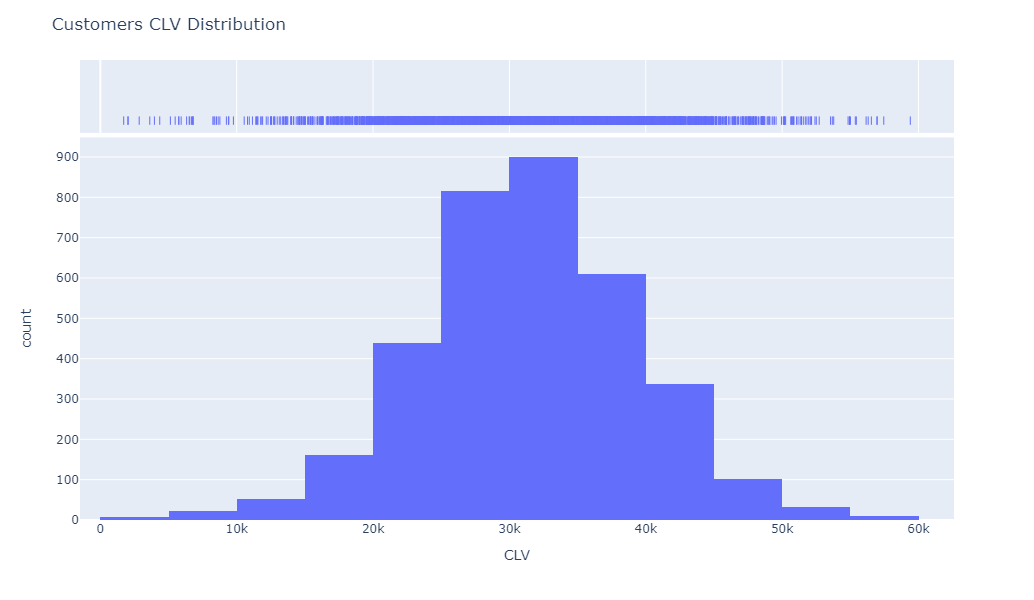

In [40]:
#visualizing customers CLV distribution
fig = px.histogram(clv_sorted, x="CLV", marginal = "rug", nbins=20)
fig.update_layout(title = "Customers CLV Distribution", width = 800, height=600, showlegend=True)
fig.show()

### 3.4 Customer Segmentation based on CLV

From the shape of the histogram it can be een that the distribution is normal. Also, the value of mean and median being close at the 31400 mark further attests to this.

In this section customers will be split into 3 categories using their CLV values with the threshold between highly valuable and low value customers around the median/mean mark 31,500.

1. Customers with CLV <  25,000 - Low Value Customers
2. Customers with CLV > 25,000 but < 38,000 - Profitable Customers
3. Customers with CLV > 38,000 - High Value Customers

In [41]:
#creating CLV category column using np.select() method
#define conditions
conditions = [
    (clv_df['CLV'] <= 25000),
    (clv_df['CLV'] > 25000) & (clv_df['CLV'] <= 38000),
    (clv_df['CLV'] > 38000)]

#define results
results = ['Low Value CLTV', 'Mid Value CLTV',  'High Value CLTV']

#create new column based on conditions in column1 and column2
clv_df['clv_category'] = np.select(conditions, results)
clv_df.head()

customer_name  customer_id  num_of_days  num_of_txns  money_spent  \
0       Aarika Magog         1368           48            6      6882.69   
1  Aarika Van Vuuren          164          198            3      2583.85   
2   Abagail Tordiffe          508          155            6      7648.20   
3       Abba Masedon           57           35            6      8748.75   
4       Abbey Murrow         2413           58            7      8666.87   

   avg_order_value        CLV     clv_category  
0          1147.12  32578.208   Mid Value CLTV  
1           861.28  24460.352   Low Value CLTV  
2          1274.70  36201.480   Mid Value CLTV  
3          1458.12  41410.608  High Value CLTV  
4          1238.12  35162.608   Mid Value CLTV

In [42]:
#CLV cateogry distribution
category_count = clv_df['clv_category'].value_counts()

#converting series to dataframe
CLV_category = pd.DataFrame(category_count)

#resetting index and setting column names
CLV_category = CLV_category.reset_index()
CLV_category.columns = ['Category', 'No_of_Customers']
CLV_category

Category  No_of_Customers
0   Mid Value CLTV             2111
1  High Value CLTV              695
2   Low Value CLTV              683

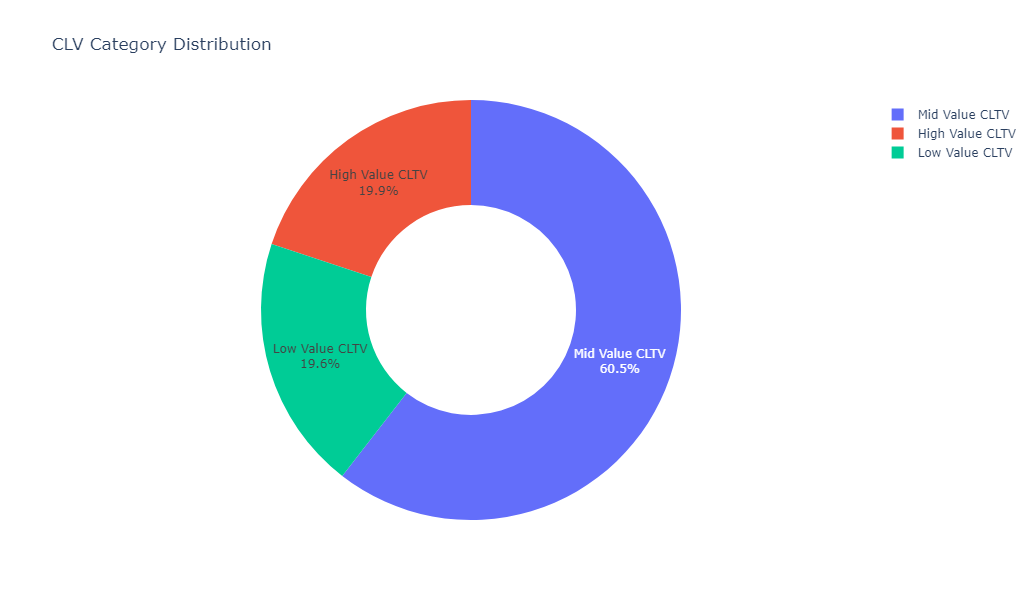

In [43]:
#visualizing CLV categories
fig = px.pie(CLV_category, values='No_of_Customers', names='Category',
             title='CLV Category Distribution',
             hover_data=['Category'], width=800, height=600, hole = 0.5)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

## 4. Combining RFM and CLTV

This section both the RFM and CLTV dataframes will be combined then customers that meets certain criteria will be selected.

### 4.1 Combining DataFrames

In [44]:
clv2 = clv_df.drop(columns = ['num_of_days'], axis =1)
clv2.head()

customer_name  customer_id  num_of_txns  money_spent  avg_order_value  \
0       Aarika Magog         1368            6      6882.69          1147.12   
1  Aarika Van Vuuren          164            3      2583.85           861.28   
2   Abagail Tordiffe          508            6      7648.20          1274.70   
3       Abba Masedon           57            6      8748.75          1458.12   
4       Abbey Murrow         2413            7      8666.87          1238.12   

         CLV     clv_category  
0  32578.208   Mid Value CLTV  
1  24460.352   Low Value CLTV  
2  36201.480   Mid Value CLTV  
3  41410.608  High Value CLTV  
4  35162.608   Mid Value CLTV

In [45]:
rfm2 = rfm_df.drop(columns = ['full_name','recency', 'frequency', 'monetary',
                              'r_score', 'f_score', 'm_score'], axis =1)
rfm2.head()

customer_id  rfm_score     customer_segment
0         1368        222  Potential Loyalists
1          164        111       Lost Customers
2          508        123      Needs Attention
3           57        223            Loyalists
4         2413        223            Loyalists

In [46]:
#combining both dataframes
clv_rfm = clv2.merge(rfm2, on = 'customer_id')
clv_rfm

customer_name  customer_id  num_of_txns  money_spent  \
0          Aarika Magog         1368            6      6882.69   
1     Aarika Van Vuuren          164            3      2583.85   
2      Abagail Tordiffe          508            6      7648.20   
3          Abba Masedon           57            6      8748.75   
4          Abbey Murrow         2413            7      8666.87   
...                 ...          ...          ...          ...   
3484       Zollie Exell         2677            5      5446.05   
3485      Zonnya Fayter         2188            6      6671.54   
3486     Zonnya Tolland         1754            5      6904.57   
3487  Zorina Bosomworth          702            3      3825.66   
3488  Zulema Cristofolo         3413            4      6325.24   

      avg_order_value        CLV     clv_category  rfm_score  \
0             1147.12  32578.208   Mid Value CLTV        222   
1              861.28  24460.352   Low Value CLTV        111   
2             1274.70  36201.480   Mid Value CLTV        123   
3             1458.12  41410.608  High Value CLTV        223   
4             1238.12  35162.608   Mid Value CLTV        223   
...               ...        ...              ...        ...   
3484          1089.21  30933.564   Mid Value CLTV        212   
3485          1111.92  31578.528   Mid Value CLTV        122   
3486          1380.91  39217.844  High Value CLTV        112   
3487          1275.22  36216.248   Mid Value CLTV        211   
3488          1581.31  44909.204  High Value CLTV        312   

         customer_segment  
0     Potential Loyalists  
1          Lost Customers  
2         Needs Attention  
3               Loyalists  
4               Loyalists  
...                   ...  
3484      Needs Attention  
3485      Needs Attention  
3486          Hibernating  
3487            Promising  
3488        New Customers  

[3489 rows x 9 columns]

### 4.2 Selecting top CLV and RFM Customers

In [47]:
#selecting customers with top CLV and RFM scores
customer1  = clv_rfm[(clv_rfm['clv_category'] == 'High Value CLTV')]
                        
customer2 = customer1.query('customer_segment in ["Champions", "Loyalists"]')
                     
print("The number of top customers is", customer2.shape[0])
customer2.head()

The number of top customers is 224


customer_name  customer_id  num_of_txns  money_spent  \
3         Abba Masedon           57            6      8748.75   
20     Adelbert Doelle         1863            6      8915.48   
49    Aigneis Brignall         2536            6      9145.10   
66      Alberik Kelsey         3415            6      8084.96   
73  Albrecht Thomasson          210            6      8805.20   

    avg_order_value        CLV     clv_category  rfm_score customer_segment  
3           1458.12  41410.608  High Value CLTV        223        Loyalists  
20          1485.91  42199.844  High Value CLTV        323        Loyalists  
49          1524.18  43286.712  High Value CLTV        323        Loyalists  
66          1347.49  38268.716  High Value CLTV        223        Loyalists  
73          1467.53  41677.852  High Value CLTV        323        Loyalists

In [48]:
pd.set_option('display.max_rows', 500)
full_details = customer2.sort_values('CLV').reset_index(drop = True)
full_details

customer_name  customer_id  num_of_txns  money_spent  \
0           Pattin Weathey          719            8     10708.56   
1         Parker Barenskie         2468           10     13390.75   
2              Urbano Mews          995            7      9379.04   
3            Symon Minchin         2182            8     10722.16   
4            Herc McIlhone         2309           12     16122.34   
5            D'arcy Rowden          630            7      9406.55   
6             Berne Fulkes         1950            9     12108.45   
7            Ellie Prester         1378            6      8072.72   
8             Damon Phelip         1144            7      9425.65   
9             Rea Pattrick          147            6      8079.09   
10         Sibella O' Mara         1765            6      8083.15   
11          Alberik Kelsey         3415            6      8084.96   
12         Arty Mac Geaney         2635            8     10781.21   
13       Sigmund Barkworth         1131            8     10787.84   
14     Analiese Grimsditch         1663            6      8093.37   
15     Madalena MacCaughey         2705            9     12147.34   
16          Harmon Bakster         2055            9     12172.04   
17             Jeth Marien         1345            6      8121.72   
18        Cassie Toffaloni         2528            7      9485.91   
19          Denys Dumingos         2816           10     13562.73   
20            Chas Carabet          840            6      8144.96   
21           Berne Donegan          402            6      8148.22   
22          Bettina Farrer          946            8     10866.75   
23         Banky Baudichon         2901            7      9512.21   
24            Ernie Wankel         2088            6      8158.30   
25              Milt Erett         3241            7      9518.20   
26          Ferd Chominski         3181            6      8160.14   
27            Nona Diamant         1039            7      9522.77   
28         Mella Petrovsky          604            6      8162.76   
29            Elysee Spurr         3379            6      8165.43   
30            Mose Middler         1696            9     12254.53   
31         Julee Hallewell         1982            8     10897.34   
32           Jillie Fyndon         2183           14     19071.32   
33             Winna Verny          515            9     12264.80   
34        Alexandr Maylard         1530           10     13634.73   
35            Mead Corkell         2793            8     10915.33   
36           Drake Riguard         2401            8     10935.93   
37      Patrizius Hardinge          887            8     10938.66   
38         Nicko Saddleton         1287            7      9575.20   
39          Conny Shearmer          533            6      8210.10   
40       Aylmer Glenwright         2653            9     12316.00   
41      Tiphany Leppington         2070            9     12319.54   
42         Nariko Dummigan         1030            8     10951.80   
43             Maryann nan         2101            9     12331.86   
44         Jed Humpherston         2310            7      9599.97   
45        Delores Ashcroft         2874           11     15091.91   
46         Jarad Barthropp         2260            6      8234.90   
47             Del Scullin         1503           10     13725.13   
48             Ibby Beedon         3204            8     10981.45   
49           Trisha Basset         2201            8     11020.84   
50           Marlie Lister         1218            6      8266.59   
51             Clare Attoe         2120            8     11028.33   
52         Katrina Coltart         1411            6      8273.80   
53           Dinnie Worsom         3050            9     12410.86   
54          Gabriello Nell         1446            7      9653.68   
55         Sorcha Genthner         2048            6      8276.52   
56          Eugenie Domenc          454            7      9662.82   
57         

## 5. Conclusion

In conclusion, this project focused on segementing a company's customer base using 2 marketing frameworks namely RFM and CLV. Both allows for better understanding of the customer base and also helps the company in predicting future revenue numbers.

Finally, both concepts were combined to the the upper echelon customers that provides most value to the business. 